In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [5]:
data_folder = './matched_beer_data/'
df = pd.read_csv(data_folder + 'users.csv', header=1)

In [6]:
df.columns

Index(['joined', 'location', 'nbr_ratings', 'nbr_reviews', 'user_id',
       'user_name', 'user_name_lower', 'joined.1', 'location.1',
       'nbr_ratings.1', 'user_id.1', 'user_name.1', 'user_name_lower.1'],
      dtype='object')

In [7]:
df

,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined.1,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1
0,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel
1,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138
2,1.207303e+09,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1.150798e+09,"United States, Washington",7452,38859,nimbleprop,nimbleprop
3,1.322737e+09,Estonia,11,0,visionthing.639993,visionthing,visionthing,1.242986e+09,Estonia,5462,91324,visionthing,visionthing
4,1.432116e+09,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1.431166e+09,England,1096,368991,LazyPyro,lazypyro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,1.253182e+09,"United States, Pennsylvania",398,398,shadesofgray.371155,ShadesOfGray,shadesofgray,1.261998e+09,"United States, Pennsylvania",1,99346,ShadesOfGray,shadesofgray
3016,1.095847e+09,"United States, Michigan",587,587,ypsifly.8833,ypsifly,ypsifly,1.139569e+09,"United States, Michigan",1,33393,ypsifly,ypsifly
3017,1.047121e+09,"United States, Texas",1379,1379,hardtarget.1712,HardTarget,hardtarget,1.095934e+09,"United States, Texas",1,15553,HardTarget,hardtarget
3018,1.416740e+09,Vietnam,176,24,nelsonsaigon.897449,nelsonsaigon,nelsonsaigon,1.406369e+09,Vietnam,1,327965,nelsonsaigon,nelsonsaigon


In [9]:
df.groupby('location').size()

location
Argentina                        1
Australia                       41
Austria                          2
Belarus                          1
Belgium                         19
                                ..
United States, West Virginia     6
United States, Wisconsin        68
United States, Wyoming           1
Uruguay                          2
Vietnam                          1
Length: 110, dtype: int64

In [15]:
df_no_double = df.drop(columns= ['joined.1', 'location.1', 'user_id.1', 'user_name.1'])

In [17]:
df_no_double['nb_ratings_ba'] =df_no_double['nbr_ratings']
df_no_double['nb_ratings_rb'] =df_no_double['nbr_ratings.1']

In [19]:
df_no_double = df_no_double.drop(columns = ['nbr_ratings','nbr_ratings.1'])

In [21]:
df_no_double = df_no_double.drop(columns='user_name_lower.1')

In [22]:
df_no_double

,joined,location,nbr_reviews,user_id,user_name,user_name_lower,nb_ratings_ba,nb_ratings_rb
0,1.220868e+09,Germany,6,erzengel.248045,Erzengel,erzengel,6,8781
1,1.348394e+09,"United States, Virginia",1,gendv138.695700,GenDV138,gendv138,1,6240
2,1.207303e+09,"United States, Washington",3,nimbleprop.208928,nimbleprop,nimbleprop,3,7452
3,1.322737e+09,Estonia,0,visionthing.639993,visionthing,visionthing,11,5462
4,1.432116e+09,England,0,lazypyro.989356,LazyPyro,lazypyro,1,1096
...,...,...,...,...,...,...,...,...
3015,1.253182e+09,"United States, Pennsylvania",398,shadesofgray.371155,ShadesOfGray,shadesofgray,398,1
3016,1.095847e+09,"United States, Michigan",587,ypsifly.8833,ypsifly,ypsifly,587,1
3017,1.047121e+09,"United States, Texas",1379,hardtarget.1712,HardTarget,hardtarget,1379,1
3018,1.416740e+09,Vietnam,24,nelsonsaigon.897449,nelsonsaigon,nelsonsaigon,176,1


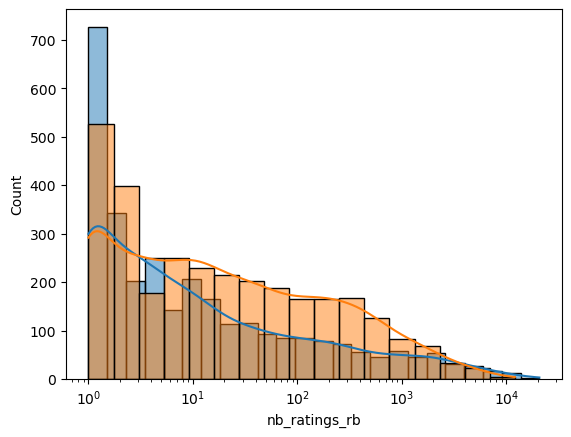

In [28]:
#Observe the distribution for the number of ratings, for each website

ax = sns.histplot(df_no_double['nb_ratings_rb'], kde=True, label='RB', log_scale = True)
ax = sns.histplot(df_no_double['nb_ratings_ba'], kde=True, label='BA', log_scale=True)

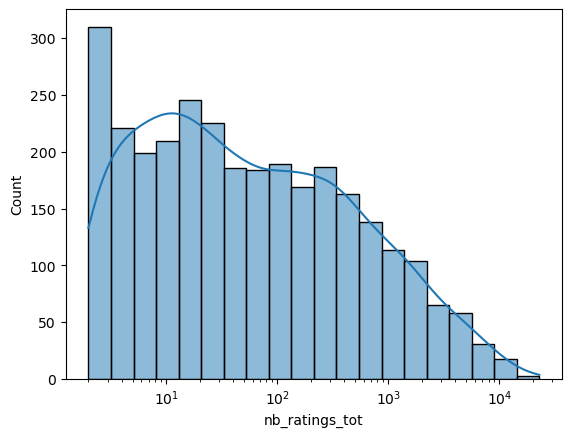

In [31]:
#Observe the distribution, by combining the number of ratings for the two websites

df_no_double['nb_ratings_tot'] = df_no_double['nb_ratings_rb'] + df_no_double['nb_ratings_ba']
ax = sns.histplot(df_no_double['nb_ratings_tot'], kde=True, label='RB', log_scale = True)


In [34]:
#Number rating per country (see if some country too represented, if very unequal)
df_no_double.groupby('location')

nb_per_country = df_no_double.nb_ratings_tot.groupby([df_no_double['location']]).sum().astype(int).reset_index(name='count')



In [37]:
nb_per_country

,location,count
0,Argentina,176
1,Australia,3985
2,Austria,33
3,Belarus,2769
4,Belgium,20519
...,...,...
105,"United States, West Virginia",4742
106,"United States, Wisconsin",19832
107,"United States, Wyoming",794
108,Uruguay,39


<Axes: xlabel='location', ylabel='count'>

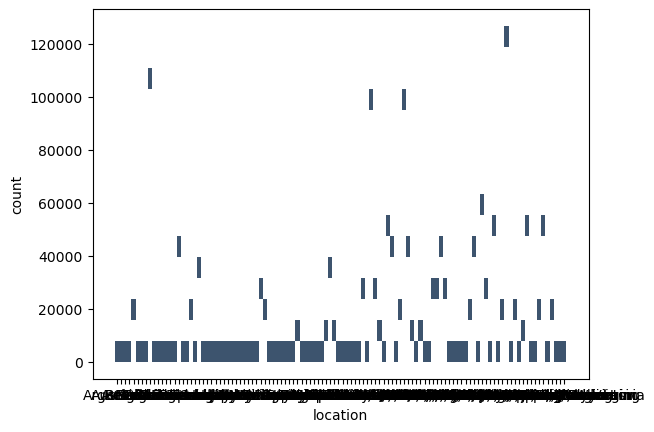

In [43]:
sns.histplot(x = 'location', y = 'count', data=nb_per_country)

In [ ]:
#Inequal between countries: how to normalize?
#TODO : afficher sur une carte avec code couleur pour nombre de reviews + faire la même pour nombre de reviewer
#Si notre de reviewer trop petit, peut être pas représentatif du pays? Peut pas tirer de conclusions sur les trends, peut être filtrer 
#Balance the countries

In [51]:
#Number of raters per country
nb_users = df_no_double.joined.groupby([df_no_double['location']]).count().reset_index(name='count')

In [52]:
nb_users

,location,count
0,Argentina,1
1,Australia,41
2,Austria,2
3,Belarus,1
4,Belgium,19
...,...,...
105,"United States, West Virginia",6
106,"United States, Wisconsin",68
107,"United States, Wyoming",1
108,Uruguay,2


<Axes: xlabel='location', ylabel='count'>

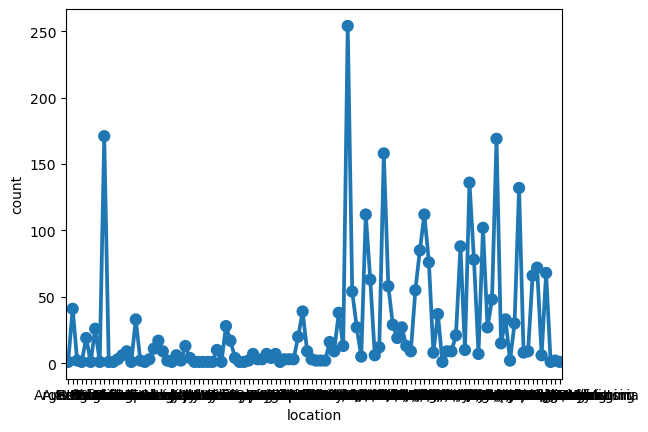

In [54]:
sns.pointplot(data=nb_users, x='location', y='count')


In [63]:
#Number of reviews per user, for each country (see if same profile of users)
data_per_user = (nb_per_country['count']/nb_users['count']).reset_index(name='count')

data_per_user

,index,count
0,0,176.000000
1,1,97.195122
2,2,16.500000
3,3,2769.000000
4,4,1079.947368
...,...,...
105,105,790.333333
106,106,291.647059
107,107,794.000000
108,108,19.500000


<Axes: xlabel='index', ylabel='count'>

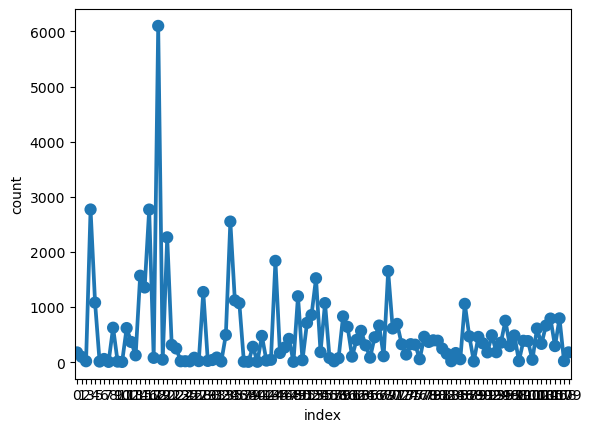

In [60]:
sns.pointplot(data=data_per_user, x='index', y='count')

In [ ]:
#Is it comparable? See how to do better graphs (on a map) + see if it is ok to compare countries even if they don't have the same pattern in ratings
#Do a graph: pattern in rating? How each country rates/what is their user profiles?
#Do categories for countries: like large-reviews countries and others? That could be selected during visualization?
#How to be sure we compare comparable things?
#Filters to observe only reviewers that are comparable, and compare between each group if same patterns of spreading?
 

In [ ]:
#Evolution with time of the number of ratings, per country (need other data)